In [1]:
import matplotlib.pyplot as plt
import glob
import pyart
import numpy as np
import cartopy.crs as ccrs
import rasterio
from rasterio.transform import from_origin, from_bounds


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



## Lectura archivo de interes

In [2]:
target_file = 'CAR241025181428.RAWXTKP'

In [3]:
arch = glob.glob(target_file)

In [4]:
# listado de los archivos en la ruta de los datos
list(arch)

['CAR241025181428.RAWXTKP']

## Analizando datos radar

In [5]:
radar = pyart.io.read(arch[0])

In [6]:
radar.info('c')

altitude: <ndarray of type: float64 and shape: (1,)>
altitude_agl: None
antenna_transition: None
azimuth: <ndarray of type: float32 and shape: (360,)>
elevation: <ndarray of type: float32 and shape: (360,)>
fields:
	total_power: <ndarray of type: float32 and shape: (360, 654)>
	reflectivity: <ndarray of type: float32 and shape: (360, 654)>
	velocity: <ndarray of type: float32 and shape: (360, 654)>
	spectrum_width: <ndarray of type: float32 and shape: (360, 654)>
	differential_reflectivity: <ndarray of type: float32 and shape: (360, 654)>
	specific_differential_phase: <ndarray of type: float32 and shape: (360, 654)>
	differential_phase: <ndarray of type: float32 and shape: (360, 654)>
	normalized_coherent_power: <ndarray of type: float32 and shape: (360, 654)>
	cross_correlation_ratio: <ndarray of type: float32 and shape: (360, 654)>
	radar_echo_classification: <ndarray of type: float32 and shape: (360, 654)>
fixed_angle: <ndarray of type: float32 and shape: (1,)>
instrument_parameters

In [7]:
radar.fixed_angle

{'long_name': 'Target angle for sweep',
 'units': 'degrees',
 'standard_name': 'target_fixed_angle',
 'data': array([15.001831], dtype=float32)}

In [8]:
radar.latitude

{'long_name': 'Latitude',
 'standard_name': 'Latitude',
 'units': 'degrees_north',
 'data': array([4.56366012])}

In [9]:
radar.longitude

{'long_name': 'Longitude',
 'standard_name': 'Longitude',
 'units': 'degrees_east',
 'data': array([-71.33273989])}

In [ ]:
# Gates
radar.range

{'units': 'meters',
 'standard_name': 'projection_range_coordinate',
 'long_name': 'range_to_measurement_volume',
 'axis': 'radial_range_coordinate',
 'spacing_is_constant': 'true',
 'comment': 'Coordinate variable for range. Range to center of each bin.',
 'data': array([ 1000.,  1150.,  1300.,  1450.,  1600.,  1750.,  1900.,  2050.,
         2200.,  2350.,  2500.,  2650.,  2800.,  2950.,  3100.,  3250.,
         3400.,  3550.,  3700.,  3850.,  4000.,  4150.,  4300.,  4450.,
         4600.,  4750.,  4900.,  5050.,  5200.,  5350.,  5500.,  5650.,
         5800.,  5950.,  6100.,  6250.,  6400.,  6550.,  6700.,  6850.,
         7000.,  7150.,  7300.,  7450.,  7600.,  7750.,  7900.,  8050.,
         8200.,  8350.,  8500.,  8650.,  8800.,  8950.,  9100.,  9250.,
         9400.,  9550.,  9700.,  9850., 10000., 10150., 10300., 10450.,
        10600., 10750., 10900., 11050., 11200., 11350., 11500., 11650.,
        11800., 11950., 12100., 12250., 12400., 12550., 12700., 12850.,
        13000.,

In [11]:
# fecha en la cual fue tomada el archivo
radar.time['units']

'seconds since 2024-10-25T18:14:28Z'

In [12]:
# nombre del radar que capturo la información
radar.metadata['instrument_name']

b'carimagua-radar'

In [13]:
# variables polarimétricas disponibles en el volumen escaneado por el radar
list(radar.fields)

['total_power',
 'reflectivity',
 'velocity',
 'spectrum_width',
 'differential_reflectivity',
 'specific_differential_phase',
 'differential_phase',
 'normalized_coherent_power',
 'cross_correlation_ratio',
 'radar_echo_classification']

## Visualización de los datos radar

### RAW

In [14]:
def graf(data, var, vmin, vmax):
    display = pyart.graph.RadarMapDisplay(data)
    fig = plt.figure(figsize = (15, 23))
    fig.add_subplot(int(str(42) + str(1)))
    display.plot_ppi(var, 0, vmin = vmin, vmax = vmax, title = var)

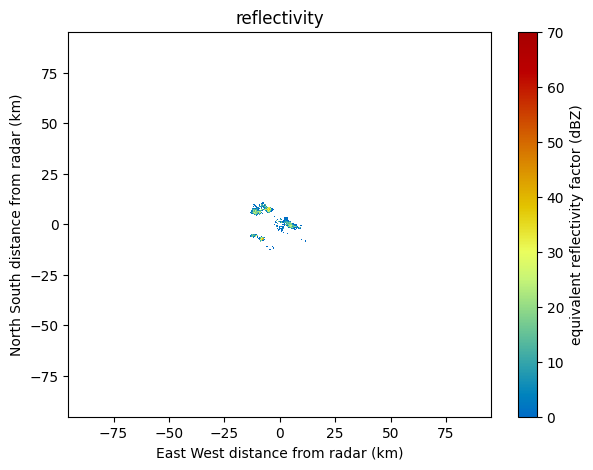

In [15]:
graf(radar, 'reflectivity', 0, 70)

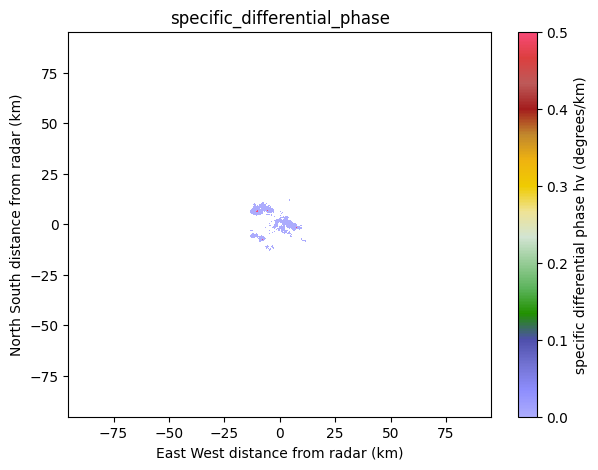

In [16]:
# diferencial específico de fase (KDP)
graf(radar, 'specific_differential_phase', 0, 0.5)

In [17]:
# plot con más de una variable polarimétrica
def graf_m(data , x , lims):
    display = pyart.graph.RadarMapDisplay(data)
    fig = plt.figure(figsize = (15, 23))
    for i in range(0, len(x)):
        fig.add_subplot(int(str(42) + str(i+1)))
        display.plot_ppi(x[i], 0, vmin = lims[i][0], vmax = lims[i][1], title = x[i] )

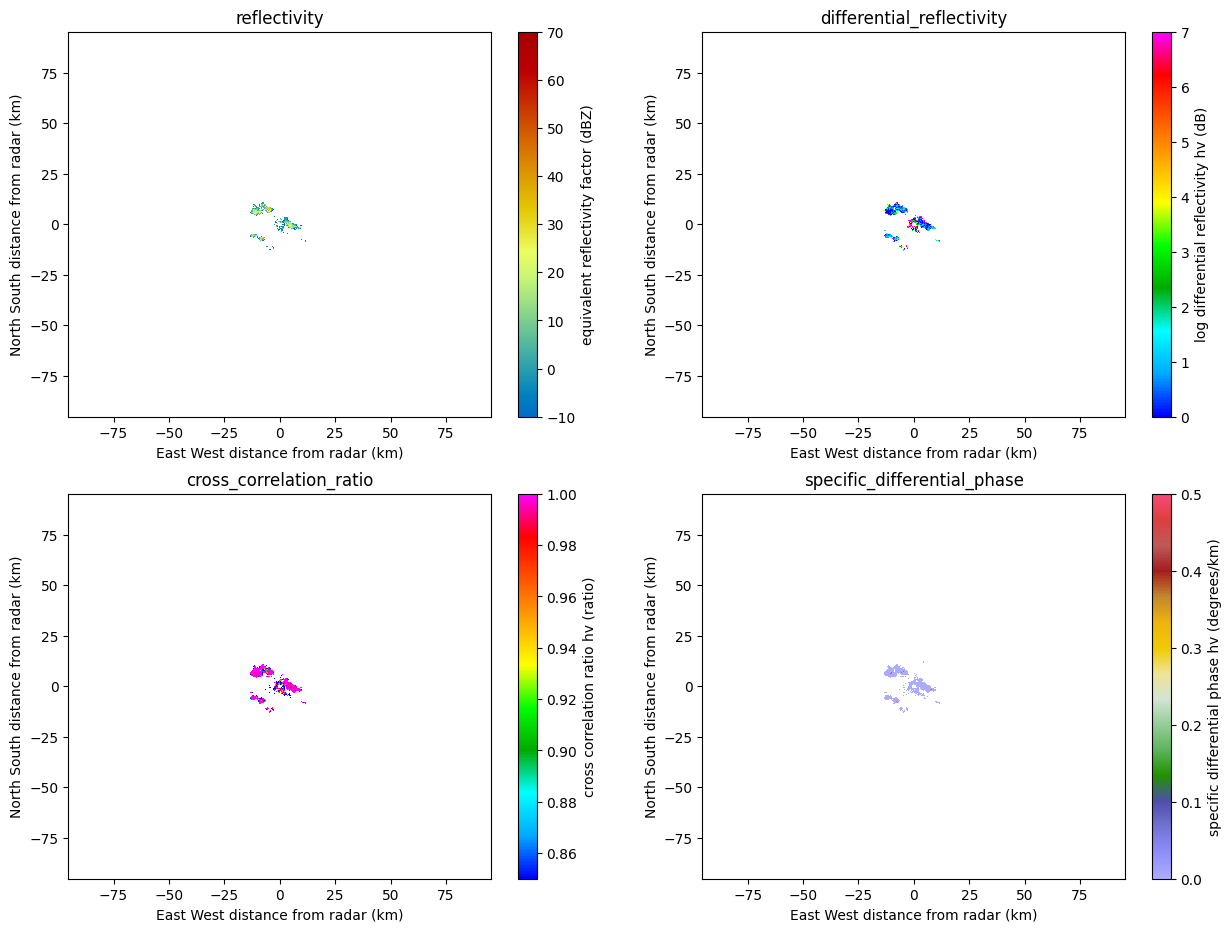

In [18]:
vmin = [-10, 0, 0.85, 0.]
vmax = [70., 7., 1., 0.5]
lims = np.column_stack((vmin, vmax))
x = ['reflectivity', 'differential_reflectivity', 'cross_correlation_ratio', 'specific_differential_phase']
graf_m(radar, x, lims)

### NC

- Para esta extensión la reflectividad esta en la variable DBZH en lugar de reflectivity
- Se identifico que para el radar de santa_elena la hora esta en un formato incorrecto (falta un espacio) 
    - radar_nc.time['units'] = 'seconds since2024-09-16T05:09:32Z' (para otros radares es 'seconds since 2024-09-16T23:56:20Z')

In [ ]:
target_file_nc = '9100SAN-20240916-050930-PPIVol-00aa.nc'

In [ ]:
radar_nc = pyart.io.read(target_file_nc)

In [ ]:
radar_nc.info('c')

altitude: <ndarray of type: float64 and shape: (1,)>
altitude_agl: None
antenna_transition: None
azimuth: <ndarray of type: float32 and shape: (1351,)>
elevation: <ndarray of type: float32 and shape: (1351,)>
fields:
	UH: <ndarray of type: float32 and shape: (1351, 960)>
	UV: <ndarray of type: float32 and shape: (1351, 960)>
	DBZH: <ndarray of type: float32 and shape: (1351, 960)>
	DBZV: <ndarray of type: float32 and shape: (1351, 960)>
	ZDR: <ndarray of type: float32 and shape: (1351, 960)>
	RHOHV: <ndarray of type: float32 and shape: (1351, 960)>
	PHIDP: <ndarray of type: float32 and shape: (1351, 960)>
	KDP: <ndarray of type: float32 and shape: (1351, 960)>
	NCPH: <ndarray of type: float32 and shape: (1351, 960)>
	NCPV: <ndarray of type: float32 and shape: (1351, 960)>
	SNRHC: <ndarray of type: float32 and shape: (1351, 960)>
	SNRVC: <ndarray of type: float32 and shape: (1351, 960)>
	VELH: <ndarray of type: float32 and shape: (1351, 960)>
	VELV: <ndarray of type: float32 and shape: 

In [ ]:
radar_nc.range

{'standard_name': 'projection_range_coordinate',
 'long_name': 'range_to_measurement_volume',
 'units': 'meters',
 'spacing_is_constant': 'true',
 'meters_to_center_of_first_gate': np.float32(62.5),
 'meters_between_gates': np.float32(125.0),
 'axis': 'radial_range_coordinate',
 'data': masked_array(data=[6.250000e+01, 1.875000e+02, 3.125000e+02, 4.375000e+02,
                    5.625000e+02, 6.875000e+02, 8.125000e+02, 9.375000e+02,
                    1.062500e+03, 1.187500e+03, 1.312500e+03, 1.437500e+03,
                    1.562500e+03, 1.687500e+03, 1.812500e+03, 1.937500e+03,
                    2.062500e+03, 2.187500e+03, 2.312500e+03, 2.437500e+03,
                    2.562500e+03, 2.687500e+03, 2.812500e+03, 2.937500e+03,
                    3.062500e+03, 3.187500e+03, 3.312500e+03, 3.437500e+03,
                    3.562500e+03, 3.687500e+03, 3.812500e+03, 3.937500e+03,
                    4.062500e+03, 4.187500e+03, 4.312500e+03, 4.437500e+03,
                    4.562500e

In [ ]:
radar_nc.time['units']

'seconds since2024-09-16T05:09:32Z'

In [ ]:
radar_nc.fixed_angle

{'standard_name': 'target_fixed_angle',
 'units': 'degrees',
 'data': masked_array(data=[2.],
              mask=False,
        fill_value=np.float64(1e+20),
             dtype=float32)}

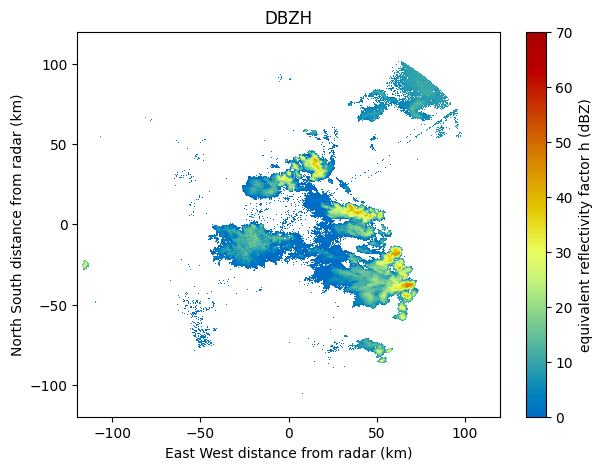

In [ ]:
graf(radar_nc, 'DBZH', 0, 70)

## Imagen georeferenciada

In [19]:
radar.fields.keys()

dict_keys(['total_power', 'reflectivity', 'velocity', 'spectrum_width', 'differential_reflectivity', 'specific_differential_phase', 'differential_phase', 'normalized_coherent_power', 'cross_correlation_ratio', 'radar_echo_classification'])

In [20]:
radar.fields['reflectivity']['data']

masked_array(
  data=[[--, 3.5, -12.0, ..., --, --, --],
        [--, -2.0, -10.5, ..., --, --, --],
        [-5.5, 4.5, -11.0, ..., --, --, --],
        ...,
        [-1.5, -7.0, 8.5, ..., --, --, --],
        [4.5, -2.5, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True, False, False, ...,  True,  True,  True],
        [ True, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        ...,
        [False, False, False, ...,  True,  True,  True],
        [False, False,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=1e+20,
  dtype=float32)

In [21]:
""" # Define figure
fig = plt.figure()

# Create a subplot with correct cartopy projection
axs = plt.subplot(111, projection=ccrs.PlateCarree())

# Create the Radar Map Display (defines x,y as lat/lons)
display = pyart.graph.RadarMapDisplay(radar)

# Display the horizontal equivalent reflectivity factor
display.plot_ppi_map(
    "reflectivity",
    ax=axs,
    vmin=-0,
    vmax=70,
    embellish=False,
    add_grid_lines = False,
    norm=None,
    cmap="pyart_HomeyerRainbow",
)

# Add gridlines
gl = axs.gridlines(
    crs=ccrs.PlateCarree(),
    draw_labels=True,
    linewidth=1,
    color="gray",
    alpha=0.3,
    linestyle="--",
)

# Make sure labels are only plotted on the left and bottom
gl.top_labels = False
gl.right_labels = False

# Customize the label size
gl.xlabel_style = {"size": 14}
gl.ylabel_style = {"size": 14}

# delete the display object
del display

# Show the plot
plt.show() """


' # Define figure\nfig = plt.figure()\n\n# Create a subplot with correct cartopy projection\naxs = plt.subplot(111, projection=ccrs.PlateCarree())\n\n# Create the Radar Map Display (defines x,y as lat/lons)\ndisplay = pyart.graph.RadarMapDisplay(radar)\n\n# Display the horizontal equivalent reflectivity factor\ndisplay.plot_ppi_map(\n    "reflectivity",\n    ax=axs,\n    vmin=-0,\n    vmax=70,\n    embellish=False,\n    add_grid_lines = False,\n    norm=None,\n    cmap="pyart_HomeyerRainbow",\n)\n\n# Add gridlines\ngl = axs.gridlines(\n    crs=ccrs.PlateCarree(),\n    draw_labels=True,\n    linewidth=1,\n    color="gray",\n    alpha=0.3,\n    linestyle="--",\n)\n\n# Make sure labels are only plotted on the left and bottom\ngl.top_labels = False\ngl.right_labels = False\n\n# Customize the label size\ngl.xlabel_style = {"size": 14}\ngl.ylabel_style = {"size": 14}\n\n# delete the display object\ndel display\n\n# Show the plot\nplt.show() '

In [22]:
def exportar_radar_a_geotiff_con_transparencia(radar, variable, nombre_archivo_salida):
    # Crear objeto de visualización de radar
    display = pyart.graph.RadarMapDisplay(radar)

    # Crear la figura sin etiquetas, título ni barra de color
    fig = plt.figure()
    display.plot_ppi(variable, 0, vmin=0, vmax=70, colorbar_flag=False, title_flag=False)
    plt.axis('off')  # Quitar ejes

    # Posición geográfica del radar
    latitude_data = radar.latitude['data'][0]
    longitude_data = radar.longitude['data'][0]

    # Guardar la imagen generada por matplotlib en un array de datos
    fig.canvas.draw()
    image_data = np.frombuffer(fig.canvas.buffer_rgba(), dtype=np.uint8)
    image_data = image_data.reshape(fig.canvas.get_width_height()[::-1] + (4,))  # Incluye el canal alfa

    # Cerrar la figura
    plt.close(fig)

    # Hacer que las áreas blancas sean transparentes
    r, g, b, a = image_data[:, :, 0], image_data[:, :, 1], image_data[:, :, 2], image_data[:, :, 3]
    mask = (r == 255) & (g == 255) & (b == 255)  # Identificar áreas blancas
    a[mask] = 0  # Hacer que las áreas blancas sean completamente transparentes
    image_data[:, :, 3] = a  # Actualizar el canal alfa

    # Definir límites geográficos de la imagen (ajusta según la extensión deseada)
    lon_min, lon_max = longitude_data, longitude_data + 1
    lat_min, lat_max = latitude_data, latitude_data + 1
    transform = from_bounds(lon_min, lat_min, lon_max, lat_max, image_data.shape[1], image_data.shape[0])

    # Guardar el archivo como un GeoTIFF con transparencia
    with rasterio.open(nombre_archivo_salida, 'w', driver='GTiff',
                       height=image_data.shape[0], width=image_data.shape[1],
                       count=4, dtype=image_data.dtype, crs='EPSG:4326',
                       transform=transform) as dst:
        for i in range(4):  # Guardar cada canal (incluido el alfa para transparencia)
            dst.write(image_data[:, :, i], i + 1)

    print("GeoTIFF con transparencia generado exitosamente.")


In [23]:
radar.longitude['data'][0]

-71.33273988962173

In [24]:
exportar_radar_a_geotiff_con_transparencia(radar, 'reflectivity', 'salida2.tif')


GeoTIFF con transparencia generado exitosamente.


## Observaciones
- Cada archivo tiene solo un ángulo objetivo para barrido (Target angle for sweep). Por tanto, se requiere descargar diferentes archivos para construir una representación completa. Por ejemplo, para el radar de Carimagua hay angulos que abarcan desde 15.001831 hasta 0.49987793